In [6]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import os                       # for testing use only

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

installation and needed libreries to the project: 

In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [8]:
import bs4
import time
from bs4 import BeautifulSoup
import pandas as pd
import scipy as sc
import numpy as np
import requests
from bs4 import BeautifulSoup
#selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import re
from datetime import datetime
from tqdm import tqdm
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


<h1>Gathering intial data from Booking</h1>
<p>Upon embarking on my initial research of the booking site, I encountered a constraint that limited the display of search results to only 40 pages, with 25 properties per page. This posed a significant challenge as it meant that a substantial portion of the available properties on the site would not be directly accessible through the search results alone.</p>
<p>To overcome this limitation and gather a more extensive dataset, I devised a meticulous approach that involved iterating through all available categories and checkboxes on the booking site. By systematically exploring these options, I aimed to cast a wider net and capture as much information as possible about the properties listed on the platform.</p>
<p>Implementing this approach required employing web scraping techniques to navigate the site and extract the desired information. However, I encountered a further hurdle due to the site's architecture, which heavily relied on JavaScript elements. Consequently, traditional web scraping libraries such as BeautifulSoup proved insufficient for this task.</p>
<p>Undeterred by this challenge, I turned to the powerful capabilities of Selenium, a robust web automation tool. Selenium allowed me to interact with and manipulate the dynamic content of the booking site, enabling me to extract the desired information effectively.</p>
<p>Using Selenium, I meticulously crafted a script that emulated user interaction with the booking site. The script systematically navigated through various categories, selected checkboxes, and proceeded to iterate through all available pages within each search configuration. In doing so, I ensured that no stone was left unturned, and I could capture a comprehensive set of data points for analysis.</p>
<p>For each property encountered during this iterative process, the script diligently extracted and saved two crucial pieces of information: the name of the property and the link to its dedicated page. These details serve as invaluable identifiers and provide a foundation for obtaining additional information about each property, such as amenities, pricing details, and user reviews.</p>
<p>By employing Selenium's robust capabilities to interact with the dynamic content of the booking site, I was able to circumvent the limitations imposed by the search results pagination. This allowed me to amass a significantly larger dataset, thereby enriching the subsequent analysis and modeling tasks that would follow.</p>

In [ ]:
driver_path = r"C:\path\to\chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
print(datetime.now().time())
# Set the URL for the search results page
url = "https://www.booking.com/searchresults.html?label=gen173nr-1FCAEoggI46AdIM1gEaGqIAQGYATG4ARfIAQzYAQHoAQH4AQKIAgGoAgO4Apbp4aMGwAIB0gIkY2I5YWZmZDctNDNkMS00YjNjLTk4ZjEtNTYxNzYwMzgwYzFi2AIF4AIB&aid=304142&ss=United+States+of+America&ssne=United+States+of+America&ssne_untouched=United+States+of+America&efdco=1&lang=en-us&sb=1&src_elem=sb&src=index&dest_id=224&dest_type=country&checkin=2023-06-01&checkout=2023-06-02&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure"

# Load the search results page
driver.get(url)

df = pd.DataFrame()

checkboxes = driver.find_elements(By.CSS_SELECTOR, ".a1b3f50dcd.be36d14cea.b2fe1a41c3.d19ba76520.efeda70352")
Len = 100
print(f"Total filters: {len(checkboxes)}")

visited_urls = []
counter = 0

# Iterate over the checkboxes and click each one to gather data
for i in range(Len):
    driver.get(url)
    checkboxes = driver.find_elements(By.CSS_SELECTOR, ".a1b3f50dcd.be36d14cea.b2fe1a41c3.d19ba76520.efeda70352")
    checkbox = checkboxes[i]
    driver.execute_script("arguments[0].click();", checkbox)
    time.sleep(3)  # Delay for 3 seconds between each checkbox click
    if driver.current_url in visited_urls:
        counter += 1
        Len += 1
        print(f"URL already visited. Counter: {counter}")
    else:
        visited_urls.append(driver.current_url)
        print(f"{i}/{Len}")
        # Perform further operations with the visited URL
        df_filter = find_places(driver.current_url)
        df = pd.concat([df, df_filter])



# Reset the DataFrame index
df = df.reset_index(drop=True)

# Print the resulting DataFrame
print(df)

# Quit the WebDriver
driver.quit()

In [9]:
def gather_data_from_a_page(url):
    data = list()
    driver.get(url)
    browser = webdriver.Chrome(executable_path=r"C:\path\to\chromedriver.exe")
    property_cards = driver.find_elements(By.CSS_SELECTOR, 'div[data-testid="property-card"]')
    for property in property_cards:
        name = property.find_element(By.CSS_SELECTOR,'div[data-testid="title"]').text
        link = property.find_element(By.CSS_SELECTOR,'a[data-testid="title-link"]').get_attribute('href')
        data.append({"Property_name": name, "link_to_property_page": link})
    return data

In [10]:
def find_places(url):
    Main_Link_data = list()
    driver.get(url)
    h1_element = driver.find_element(By.CSS_SELECTOR, 'h1[aria-label^="Search results updated."]')
    string_n_properties = h1_element.get_attribute('aria-label').split(':')[1].strip().split(' ')[0]
    n_properties = int(string_n_properties.replace(",", ""))

    print(f"Properties found in catagroy: {n_properties}")


    if(int(n_properties/25)>40):
        n_pages = 40
    else:
        n_pages = int(n_properties/25)

    print("Number of pages: " + str(n_pages))

    for i in range(n_pages):
        offset = i * 25
        open_url = f"{url}&offset={offset}"
        Main_Link_data.extend(gather_data_from_a_page(open_url))

    df = pd.DataFrame(Main_Link_data)
    return df

In [11]:
df_unique = pd.read_csv('output_uniqueT.csv')

<h3> changing the booking dates and delying them in one month</h3>

In [12]:
df_T = df_unique
counter=0
new_urls = []

for url in df_unique['link_to_property_page']:
    try:
        
        modified_url = url.replace("-06-", "-07-")

        new_urls.append(modified_url)
    except IndexError:
        counter+=1
        # Handle the case where the delimiter is not found in the URL
        # You can choose to skip the URL or perform a different action here
        new_urls.append(url)

# Create a new column in the DataFrame to store the modified URLs
df_T['modified_url'] = new_urls

In [13]:
df_unique

,Property_name,link_to_property_page,modified_url
0,Tropicana Laughlin,https://www.booking.com/hotel/us/tropicana-lau...,https://www.booking.com/hotel/us/tropicana-lau...
1,Tropicana Casino and Resort,https://www.booking.com/hotel/us/tropicana-cas...,https://www.booking.com/hotel/us/tropicana-cas...
2,Budget Inn Adair,https://www.booking.com/hotel/us/budget-inn-ad...,https://www.booking.com/hotel/us/budget-inn-ad...
3,Super 8 by Wyndham Kenedy,https://www.booking.com/hotel/us/studio-6-kene...,https://www.booking.com/hotel/us/studio-6-kene...
4,Shamrock Country Inn,https://www.booking.com/hotel/us/shamrock-coun...,https://www.booking.com/hotel/us/shamrock-coun...
...,...,...,...
27557,Rancho Bernardo Inn,https://www.booking.com/hotel/us/rancho-bernar...,https://www.booking.com/hotel/us/rancho-bernar...
27558,"Beautiful Casita, La Quinta Legacy Villas Resort",https://www.booking.com/hotel/us/beautiful-cas...,https://www.booking.com/hotel/us/beautiful-cas...
27559,Village at Breckenridge Resort,https://www.booking.com/hotel/us/village-at-br...,https://www.booking.com/hotel/us/village-at-br...
27560,Eritage Resort,https://www.booking.com/hotel/us/eritage-resor...,https://www.booking.com/hotel/us/eritage-resor...


In [14]:
df_unique.to_csv('output_unique2.csv', index=False)

<h1>Gathering data from each property</h1>
<p>In this stage i gathered the following information from each property:</p>
<ol>
<li>The name of the property</li>
<li>The Type of the property</li>
<li>The Rating of the facility</li>
<li>The Number of reviews of the facility</li>
<li>The State of the facility</li>
<li>How many stars the property has</li>
<li>Its Facilities</li>
<li>Average price per room</li>
<li>Average size of room</li>
<li>Average price for meter</li>
</ol>
<p>I had a total of 27.5K properties that made the cut after the first filter stage.</p>
<p>That means that I had in total <strong>275K</strong> data.</p>

In [15]:
def gather_data_from_a_page_property(args):
    name, url = args

    chrome_options = webdriver.ChromeOptions()
    browser = webdriver.Chrome(executable_path=r"C:\path\to\chromedriver.exe", options=chrome_options)

    browser.get(url)

    # Creating a DataFrame for the property
    df = pd.DataFrame(index=range(0))

    # 0 Name
    df["Name"] = [name]

    # 1 Type
    try:
        description = browser.find_element(By.ID, 'property_description_content').text
        if "hotel" in description.lower() or "hotel" in name.lower():
            df["Type"] = "hotel"
        elif "motel" in description.lower() or "motel" in name.lower():
            df["Type"] = "motel"
        else:
            df["Type"] = "other"
    except NoSuchElementException:
        df["Type"] = "NaN"

    # 2 The Rating of the facility
    try:
        df["Rating"] = [browser.find_element(By.CSS_SELECTOR, '.b5cd09854e.d10a6220b4').text]
    except NoSuchElementException:
        df["Rating"] = "NaN"

    # 3 The Number of reviews of the facility
    try:
        reviews_string = str(browser.find_element(By.CSS_SELECTOR, '.d8eab2cf7f.c90c0a70d3.db63693c62').text)
        df["Number_of_reviews"] = int(re.search(r'\d+', reviews_string).group())
    except NoSuchElementException:
        df["Number_of_reviews"] = "NaN"

    # 4 The State of the facility
    try:
        Location = browser.find_element(By.CSS_SELECTOR, '.hp_address_subtitle.js-hp_address_subtitle.jq_tooltip').text
        df["State"] = [Location.split(",")[-2].strip().split(" ")[0]]
    except NoSuchElementException:
        df["State"] = "NaN"

    # 5 How many stars the facility has
    try:
        df["Stars"] = [len(browser.find_elements(By.CSS_SELECTOR, '.b6dc9a9e69.adc357e4f1.fe621d6382'))]
    except NoSuchElementException:
        df["Stars"] = "NaN"

    # 6 Facilities
    try:
        facilities = browser.find_elements(By.CSS_SELECTOR, '.db312485ba')
        unique_facilities = set()
        for facility in facilities:
            unique_facilities.add(facility.text)
        df["facilities"] = [unique_facilities]
    except NoSuchElementException:
        df["facilities"] = "NaN"

    # 7 Average price per room
    try:
        prices = browser.find_elements(By.CSS_SELECTOR, '.prco-valign-middle-helper')
        total_prices = 0
        for p in prices:
            clean_p = (p.text).replace("₪", "").replace(",", "")
            total_prices += int(clean_p)
        if total_prices != 0:
            df["Average_price_per_room"] = total_prices / len(prices)
        else:
            df["Average_price_per_room"] = "NaN"
    except NoSuchElementException:
        df["Average_price_per_room"] = "NaN"

    # 8 Average size of room
    try:
        room_sizes = browser.find_elements(By.CSS_SELECTOR, '[data-name-en="room size"]')
        total_sizes = 0
        for room_size in room_sizes:
            size = (room_size.text).replace("m²", "")
            total_sizes += (int(size))
        if total_sizes != 0:
            df["Average_size_per_room"] = total_sizes / len(room_sizes)
            df["Average_price_for_meter"] = df["Average_price_per_room"] / df["Average_size_per_room"]
        else:
            df["Average_size_per_room"] = "NaN"
            df["Average_price_for_meter"] = "NaN"
    except NoSuchElementException:
        df["Average_size_per_room"] = "NaN"
        df["Average_price_for_meter"] = "NaN"

    browser.quit()
    return df


In [ ]:
df_of_places = pd.DataFrame()
dfs_to_concat = []

save_directory = "data/"
total_sites = len(df_T)
start_index = 0  # Specify the index to start from

print(f"Total sites: {total_sites}")

with tqdm(total=total_sites - start_index) as pbar:
    for index, row in enumerate(df_T.iloc[start_index:].iterrows(), start=start_index):
        args = (row[1]['Property_name'], row[1]['modified_url'])
        df_property = gather_data_from_a_page_property(args)
        df_of_places = pd.concat([df_of_places, df_property], ignore_index=True)

        pbar.update(1)  # Update the progress bar

        if (index + 1) % 100 == 0:
            # Save the DataFrame to a file
            filename = os.path.join(save_directory, f"df_{index + 1}.csv")
            df_of_places.to_csv(filename, index=False)

# Save the final DataFrame to a file
filename = os.path.join(save_directory, "df_final.csv")
df_of_places.to_csv(filename, index=False)

<h1>Part 2 - Data identification and filtering</h1>

Connecting all the sub-files - tables of the data

In [16]:
dfs = []
save_directory = "data/"

# Iterate over each file in the directory
for filename in os.listdir(save_directory):
    if filename.endswith('.csv'):
        # File path
        filepath = os.path.join(save_directory, filename)
        
        # Read CSV file and append to the list of dataframes
        df = pd.read_csv(filepath)
        dfs.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Export the combined dataframe to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

In [17]:
combined_df

,Name,Type,Rating,Number_of_reviews,State,Stars,facilities,Average_price_per_room,Average_size_per_room,Average_price_for_meter
0,Roami at The Carmela,other,7.9,49.0,FL,3,"{'Kitchenware', 'Private entrance', 'Towels', ...",NaN,NaN,NaN
1,Casita,other,8.0,61.0,NV,3,"{'Outdoor furniture', 'Coffee machine', 'Priva...",NaN,NaN,NaN
2,Lodge on Big Brook adjoining state easement Hu...,other,NaN,2.0,NY,0,"{'Kitchenware', 'Oven', 'Towels', 'Free WiFi',...",1346.0,111.0,12.126126
3,Roami at The Palm,other,7.3,44.0,FL,3,"{'Private entrance', 'Towels', 'Free WiFi', 'C...",NaN,NaN,NaN
4,The Little Brown House MCA #705,other,6.4,10.0,97130,3,"{'ATM on site', 'Dining area', 'Outdoor furnit...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
27457,Rancho Bernardo Inn,other,7.4,54.0,CA,4,"{'Tennis court', 'Non-smoking rooms', 'Pool ba...",NaN,NaN,NaN
27458,"Beautiful Casita, La Quinta Legacy Villas Resort",other,8.4,23.0,CA,0,"{'Non-smoking rooms', 'Shower', 'Hairdryer', '...",NaN,NaN,NaN
27459,Village at Breckenridge Resort,other,8.1,332.0,CO,3,"{'CCTV outside property', 'Electric vehicle ch...",NaN,NaN,NaN
27460,Eritage Resort,other,8.5,69.0,WA,0,"{'CCTV outside property', 'Safe', 'Electric ve...",NaN,NaN,NaN


In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27462 entries, 0 to 27461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     27462 non-null  object 
 1   Type                     27348 non-null  object 
 2   Rating                   26542 non-null  float64
 3   Number_of_reviews        26827 non-null  float64
 4   State                    27348 non-null  object 
 5   Stars                    27462 non-null  int64  
 6   facilities               27462 non-null  object 
 7   Average_price_per_room   21569 non-null  float64
 8   Average_size_per_room    19232 non-null  float64
 9   Average_price_for_meter  19232 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.1+ MB


<h2>We can see that there are incomplete lines that need to be addressed</h2>

In [19]:
clean_db = combined_df.copy()
clean_db = clean_db.dropna()

# STATE
clean_db = clean_db[clean_db['State'].str.len() == 2]

# NUMBER OF REVIEWS AT LEAST 10
clean_db['Number_of_reviews'] = clean_db['Number_of_reviews'].astype(int)
clean_db = clean_db[clean_db['Number_of_reviews'] > 10]

# STARS BETWEEN 0 TO 7
clean_db = clean_db[(clean_db['Stars'] >= 0) & (clean_db['Stars'] <= 7)]

# PRINT INFORMATION
clean_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14529 entries, 7 to 27461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     14529 non-null  object 
 1   Type                     14529 non-null  object 
 2   Rating                   14529 non-null  float64
 3   Number_of_reviews        14529 non-null  int32  
 4   State                    14529 non-null  object 
 5   Stars                    14529 non-null  int64  
 6   facilities               14529 non-null  object 
 7   Average_price_per_room   14529 non-null  float64
 8   Average_size_per_room    14529 non-null  float64
 9   Average_price_for_meter  14529 non-null  float64
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 1.2+ MB


In [20]:
clean_db.head(5)


,Name,Type,Rating,Number_of_reviews,State,Stars,facilities,Average_price_per_room,Average_size_per_room,Average_price_for_meter
7,Casa Del Mar - Waterfront - WIFI - Heated Pool,other,8.6,13,FL,4,"{'Dining area', 'Kitchenware', 'Oven', 'Coffee...",928.000000,65.000000,14.276923
23,The Van Zant House,other,8.3,52,FL,3,"{'CCTV outside property', 'Outdoor furniture',...",386.000000,74.000000,5.216216
28,Sonder Lafayette Square,hotel,8.1,229,LA,4,"{'Desk', 'Dining area', 'Kitchenware', 'Oven',...",3831.666667,104.000000,36.842949
32,Lombardy Hotel,hotel,8.4,624,NY,4,"{'CCTV outside property', 'Waxing services', '...",1940.923077,60.833333,31.905585
34,Ocean Park Resort,hotel,7.2,941,SC,2,"{'Mini golf', 'ATM on site', 'Dining area', 'O...",1631.000000,93.000000,17.537634


In [21]:
import pandas as pd

# Create a new column for facility count
clean_db['facility_count'] = 0

# Iterate over each row in the DataFrame
for i, row in clean_db.iterrows():
    facilities = eval(row['facilities'])
    facility_count = len(facilities)
    clean_db.at[i, 'facility_count'] = facility_count

# Calculate unique options and their counts
column_data = clean_db['facilities'].tolist()
unique_options = set()

for cell_data in column_data:
    cell_set = eval(cell_data)
    unique_options.update(cell_set)
option_counts = {}
for option in unique_options:
    count = sum(option in cell for cell in column_data)
    option_counts[option] = count

# Sort the options based on their occurrence count
sorted_options = sorted(option_counts.items(), key=lambda x: x[1], reverse=True)


In [22]:
modified1_db = clean_db.copy()

top_30_facilities = [facility[0] for facility in sorted_options[:30]]
for facility in top_30_facilities:
    modified1_db[facility] = 0

for index, row in clean_db.iterrows():
    facilities = row['facilities']

    for facility in top_30_facilities:
        if facility in facilities:
            modified1_db.at[index, facility] = 1
    
modified1_db = modified1_db.drop("facilities", axis=1)

In [23]:
modified1_db = modified1_db.dropna()
modified1_db.reset_index(drop=True, inplace=True)

<h3>Outliers</h3>
Outliers are observations that deviate significantly from the overall pattern or distribution of the data. They are data points that lie far away from the majority of the observations and may indicate anomalies, errors, or unusual instances in the dataset.

In [24]:
modified1_db.describe(include='all')

,Name,Type,Rating,Number_of_reviews,State,Stars,Average_price_per_room,Average_size_per_room,Average_price_for_meter,facility_count,...,Fitness,Fitness center,Accessible parking,Elevator,Hairdryer,Cable channels,Bathtub,Iron,Alarm clock,Toilet paper
count,14529,14529,14529.000000,14529.000000,14529,14529.000000,14529.000000,14529.000000,14529.000000,14529.000000,...,14529.00000,14529.000000,14529.000000,14529.000000,14529.000000,14529.000000,14529.000000,14529.000000,14529.000000,14529.000000
unique,14529,3,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Casa Del Mar - Waterfront - WIFI - Heated Pool,hotel,NaN,NaN,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,11171,NaN,NaN,1478,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.609801,329.407323,NaN,2.619588,760.063114,37.098091,23.812944,48.442838,...,0.59894,0.584762,0.583591,0.573749,0.569895,0.560396,0.555303,0.554202,0.549935,0.539817
std,NaN,NaN,1.109687,234.758944,NaN,0.941958,749.713339,54.921487,17.865295,23.037440,...,0.49013,0.492780,0.492980,0.494548,0.495108,0.496356,0.496949,0.497071,0.497517,0.498429
min,NaN,NaN,2.000000,11.000000,NaN,0.000000,57.500000,15.000000,0.191667,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,7.000000,145.000000,NaN,2.000000,437.111111,25.666667,14.781586,31.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,7.900000,268.000000,NaN,3.000000,611.153846,29.500000,20.015444,46.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,8.400000,464.000000,NaN,3.000000,845.304348,35.000000,28.166667,63.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we need to handle: Number_of_reviews, Average_price_per_room, Average_size_per_room, Average_price_for_meter,facility_count

Text(0, 0.5, 'Frequency')

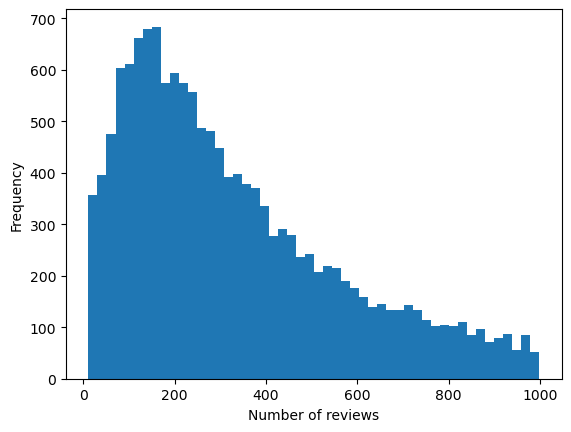

In [25]:
plt.hist(modified1_db.Number_of_reviews, bins= 50)
plt.xlabel("Number of reviews")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

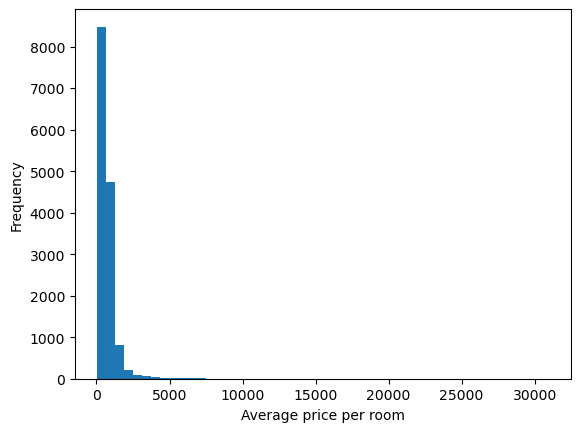

In [26]:
plt.hist(modified1_db.Average_price_per_room, bins= 50)
plt.xlabel("Average price per room")
plt.ylabel("Frequency")

In [27]:
sum(modified1_db.Average_price_per_room>5000)

64

In [28]:
Q1 = np.percentile(modified1_db["Average_price_per_room"], 10)
Q3 = np.percentile(modified1_db["Average_price_per_room"], 90)
IQR = Q3 - Q1
modified1_db.Average_price_per_room[(modified1_db["Average_price_per_room"] < Q1 - 1.5*IQR) | (modified1_db["Average_price_per_room"] > Q3 + 1.5*IQR )]= np.nan

Text(0, 0.5, 'Frequency')

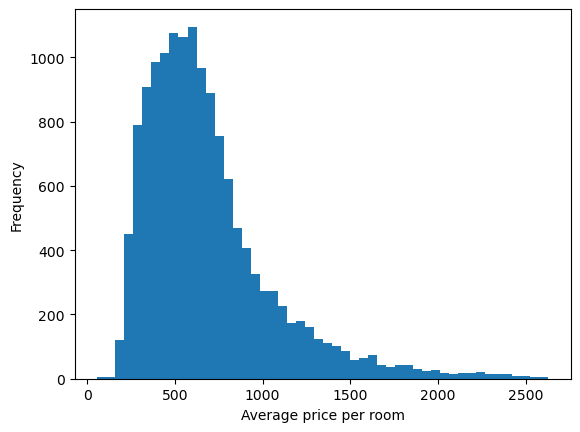

In [29]:
plt.hist(modified1_db.Average_price_per_room, bins= 50)
plt.xlabel("Average price per room")
plt.ylabel("Frequency")

<h2>now, Average size per room </h2>

Text(0, 0.5, 'Frequency')

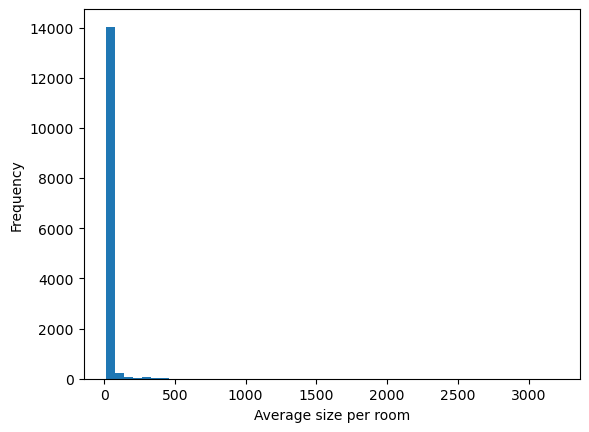

In [30]:
plt.hist(modified1_db.Average_size_per_room, bins= 50)
plt.xlabel("Average size per room")
plt.ylabel("Frequency")

In [31]:
modified1_db.Average_size_per_room[modified1_db.Average_size_per_room>100] = np.nan

Text(0, 0.5, 'Frequency')

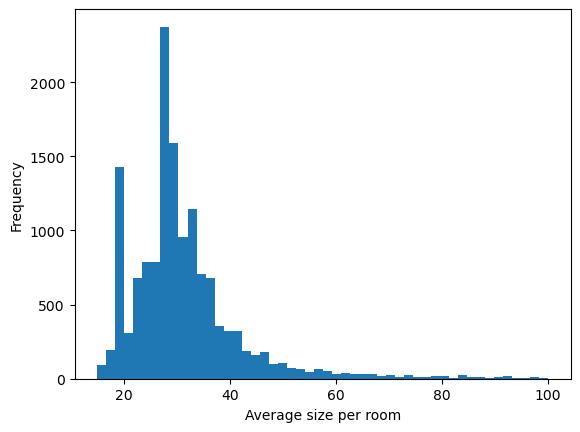

In [32]:
plt.hist(modified1_db.Average_size_per_room, bins= 50)
plt.xlabel("Average size per room")
plt.ylabel("Frequency")

<h2>now, Average price per meter </h2>

Text(0, 0.5, 'Frequency')

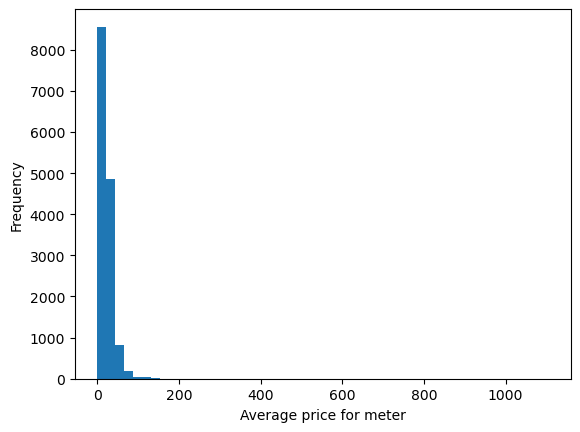

In [33]:
plt.hist(modified1_db.Average_price_for_meter, bins= 50)
plt.xlabel("Average price for meter")
plt.ylabel("Frequency")

In [34]:
modified1_db.Average_price_for_meter[modified1_db.Average_price_for_meter>100] = np.nan

Text(0, 0.5, 'Frequency')

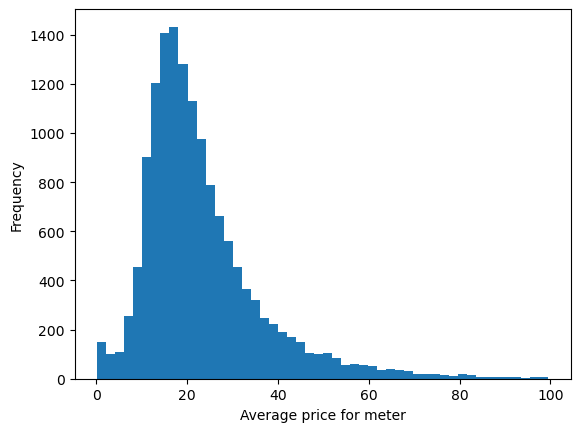

In [35]:
plt.hist(modified1_db.Average_price_for_meter, bins= 50)
plt.xlabel("Average price for meter")
plt.ylabel("Frequency")

In [36]:
modified2_db = modified1_db.copy()
modified2_db.dropna(inplace=True)
modified2_db.describe(include='all')


,Name,Type,Rating,Number_of_reviews,State,Stars,Average_price_per_room,Average_size_per_room,Average_price_for_meter,facility_count,...,Fitness,Fitness center,Accessible parking,Elevator,Hairdryer,Cable channels,Bathtub,Iron,Alarm clock,Toilet paper
count,13927,13927,13927.000000,13927.000000,13927,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000,...,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000,13927.000000
unique,13927,3,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Casa Del Mar - Waterfront - WIFI - Heated Pool,hotel,NaN,NaN,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10780,NaN,NaN,1429,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.588160,332.608099,NaN,2.584261,689.339832,30.906908,23.077054,47.831335,...,0.595965,0.581748,0.585481,0.573060,0.571049,0.564802,0.558340,0.549795,0.554965,0.542902
std,NaN,NaN,1.105693,234.506983,NaN,0.904410,373.306615,10.382921,11.945082,22.223408,...,0.490722,0.493290,0.492656,0.494651,0.494944,0.495801,0.496603,0.497532,0.496987,0.498174
min,NaN,NaN,2.000000,11.000000,NaN,0.000000,96.142857,15.000000,2.304348,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,7.000000,148.000000,NaN,2.000000,433.961538,25.200000,15.049791,31.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,7.800000,272.000000,NaN,3.000000,605.000000,29.000000,20.064732,46.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,8.400000,469.000000,NaN,3.000000,825.102679,34.000000,27.811094,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1>Part 3 -EDA</h1>
EDA, is an essential step in the data analysis process. It involves examining and understanding the structure, patterns, and characteristics of the dataset before applying any formal statistical techniques or building predictive models.
The primary goal of EDA is to uncover insights, identify patterns, and detect any irregularities or anomalies in the data. 

<html>
    <head>

</head>
<body>
    <h1>Summary of the data:</h1>
    <table>
        <tr>
            <th>Hebrew</th>
            <th>English</th>
        </tr>
        <tr>
            <td>שמי</td>
            <td>Nominal</td>
        </tr>
        <tr>
            <td>סדר</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>רווח</td>
            <td>Interval</td>
        </tr>
        <tr>
            <td>מנה</td>
            <td>Ratio</td>
        </tr>
    </table>
    <table>
        <tr>
            <th>Index</th>
            <th>Name of the filed</th>
            <th>Type of object</th>
            <th>Type of Measurement</th>
        </tr>
        <tr>
            <td>0</td>
            <td>Name</td>
            <td>String</td>
            <td>Nominal</td>
        </tr>
        <tr>
            <td>1</td>
            <td>Type</td>
            <td>String</td>
            <td>Nominal</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Rating</td>
            <td>Float</td>
            <td>Interval</td>
        </tr>
        <tr>
            <td>3</td>
            <td>Number_of_reviews</td>
            <td>Int</td>
            <td>XX</td>
        </tr>
        <tr>
            <td>4</td>
            <td>State</td>
            <td>String</td>
            <td>Nominal</td>
        </tr>
        <tr>
            <td>5</td>
            <td>Stars</td>
            <td>Int</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>6</td>
            <td>Average_price_per_room</td>
            <td>Float</td>
            <td>Ratio</td>
        </tr>
        <tr>
            <td>7</td>
            <td>Average_size_per_room</td>
            <td>Float</td>
            <td>Ratio</td>
        </tr>
        <tr>
            <td>8</td>
            <td>Average_price_for_meter</td>
            <td>Float</td>
            <td>Ratio</td>
        </tr>
        <tr>
            <td>9</td>
            <td>facility_count</td>
            <td>Int</td>
            <td>Ratio</td>
        </tr>
        <tr>
            <td>10-39</td>
            <td>English</td>
            <td>Int</td>
            <td>Nominal</td>
        </tr>
    </table>
   
    <h3>In Total 14529 rows × 40 columns = 550K+- data</h3>
    
</body>
</html>


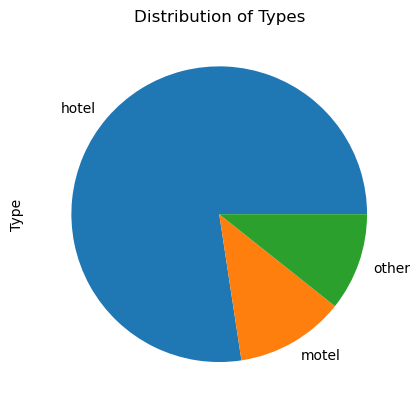

In [37]:
fig, ax = plt.subplots()
modified2_db['Type'].value_counts().plot(kind='pie', ax=ax)
ax.set_title("Distribution of Types")
plt.show()

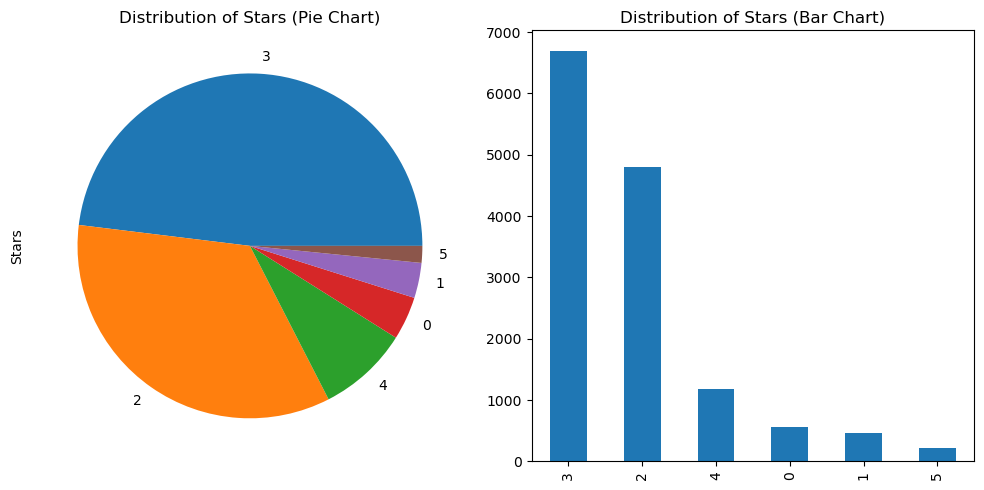

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

modified2_db['Stars'].value_counts().plot(kind='pie', ax=ax1)
ax1.set_title("Distribution of Stars (Pie Chart)")

modified2_db['Stars'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title("Distribution of Stars (Bar Chart)")

plt.tight_layout()
plt.show()

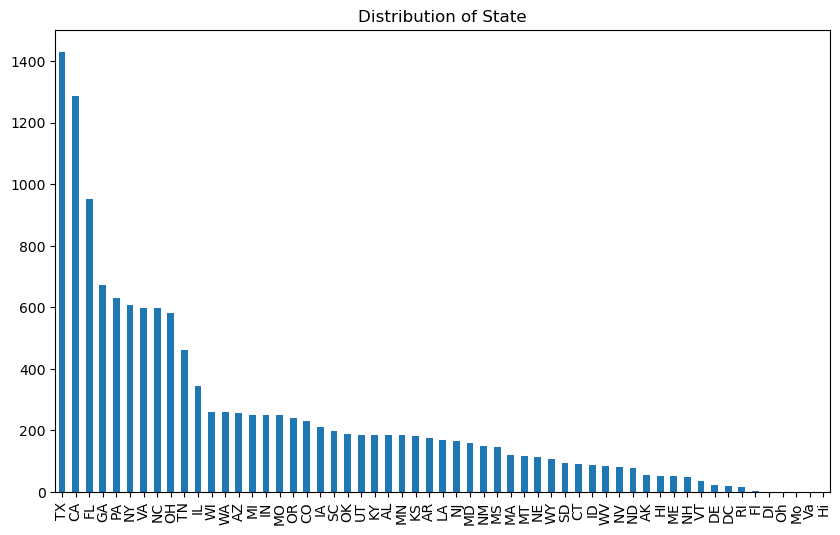

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
modified2_db['State'].value_counts().plot(kind='bar', ax=ax)
ax.set_title("Distribution of State")
plt.show()

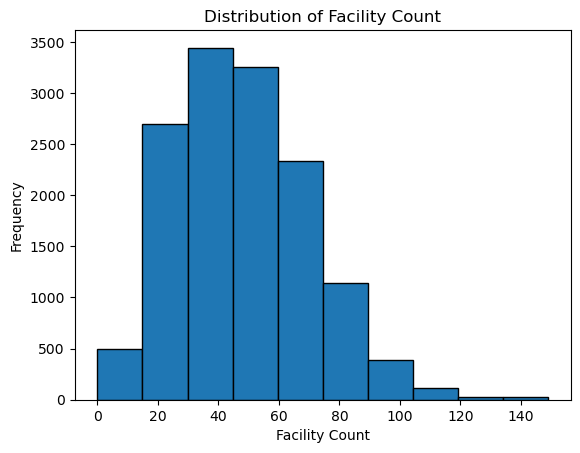

In [40]:
plt.hist(modified2_db['facility_count'], bins=10, edgecolor='black')
plt.xlabel('Facility Count')
plt.ylabel('Frequency')
plt.title('Distribution of Facility Count')
plt.show()

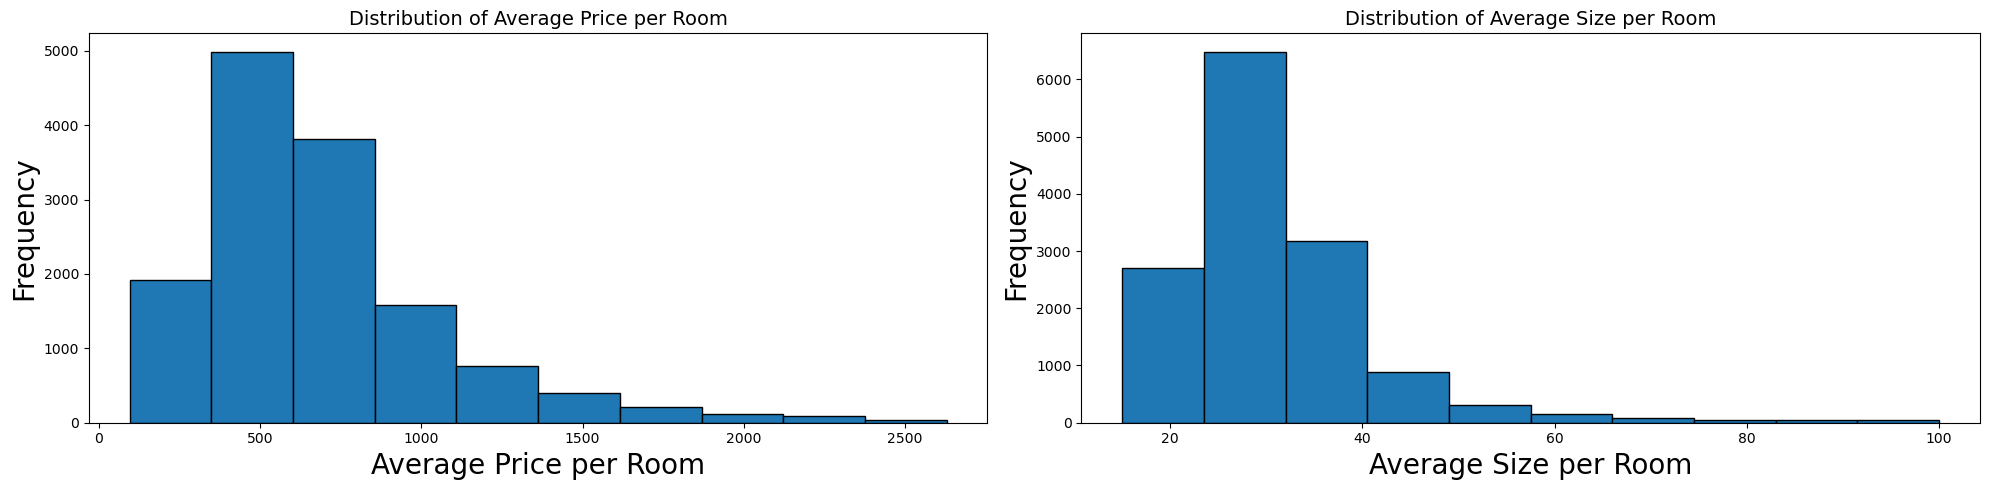

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(modified2_db['Average_price_per_room'], bins=10, edgecolor='black')
plt.xlabel('Average Price per Room', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Distribution of Average Price per Room', fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(modified2_db['Average_size_per_room'], bins=10, edgecolor='black')
plt.xlabel('Average Size per Room', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Distribution of Average Size per Room', fontsize=14)

plt.tight_layout()
plt.show()


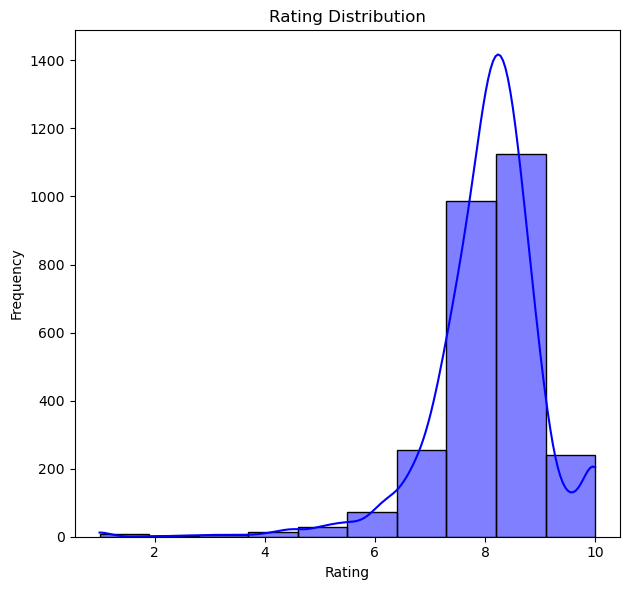

In [42]:
# Select the boolean columns in the range 10-30
boolean_columns = modified2_db.iloc[:, 10:31]
correlation_matrix = boolean_columns.corr()
plt.figure(figsize=(12, 6))

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, cbar_kws={'label': 'Correlation'})

# Plot the bar chart for rating frequency
plt.subplot(1, 2, 2)
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

plt.tight_layout()
plt.show()


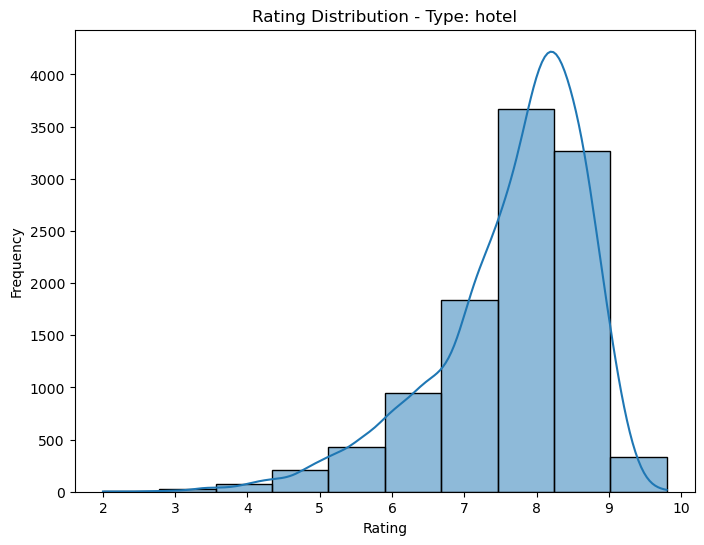

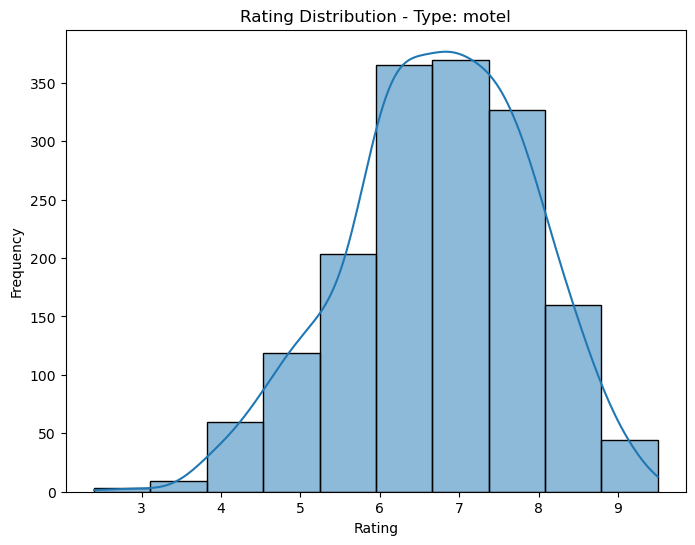

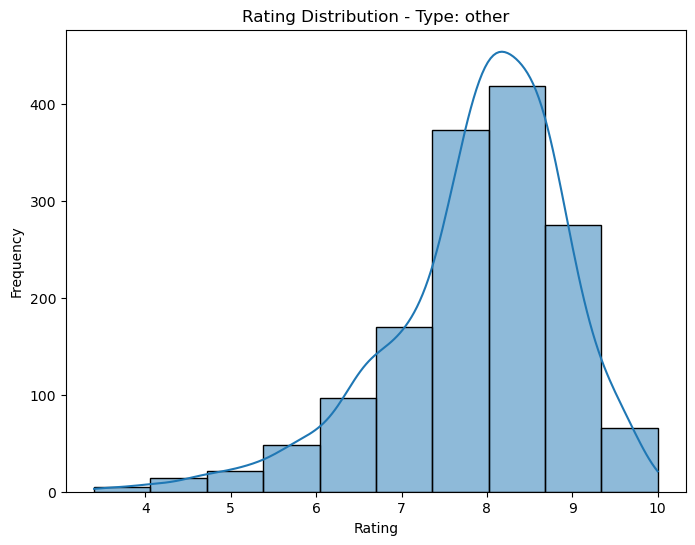

In [43]:
grouped = modified2_db.groupby('Type')

# Iterate over the groups
for category, group in grouped:
    plt.figure(figsize=(8, 6))
    
    # Plot the rating distribution for the current category
    sns.histplot(data=group, x='Rating', bins=10, kde=True)
    
    # Set plot title and labels
    plt.title(f"Rating Distribution - Type: {category}")
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    
    plt.show()

<h2>2D</h2>

In [44]:
from mpl_toolkits.mplot3d import Axes3D


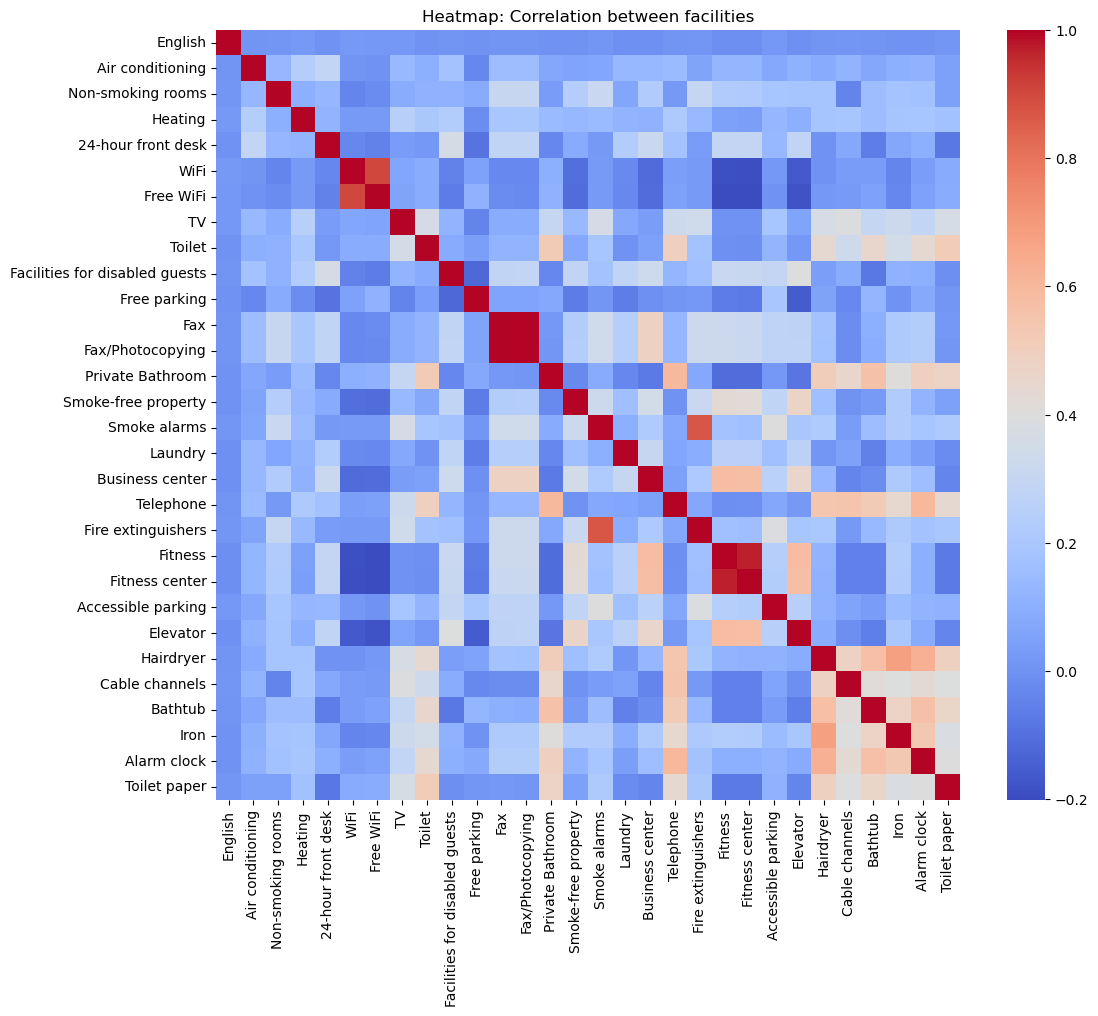

In [45]:
boolean_columns = modified2_db.iloc[:, 10:40]

# Calculate the correlation matrix
correlation_matrix = boolean_columns.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)

# Customize the plot
plt.title('Heatmap: Correlation between facilities')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [46]:
modified2_db.head()

,Name,Type,Rating,Number_of_reviews,State,Stars,Average_price_per_room,Average_size_per_room,Average_price_for_meter,facility_count,...,Fitness,Fitness center,Accessible parking,Elevator,Hairdryer,Cable channels,Bathtub,Iron,Alarm clock,Toilet paper
0,Casa Del Mar - Waterfront - WIFI - Heated Pool,other,8.6,13,FL,4,928.000000,65.000000,14.276923,100,...,1,1,0,0,1,1,1,1,0,1
1,The Van Zant House,other,8.3,52,FL,3,386.000000,74.000000,5.216216,31,...,0,0,1,0,0,0,0,0,0,0
3,Lombardy Hotel,hotel,8.4,624,NY,4,1940.923077,60.833333,31.905585,51,...,1,1,1,1,1,0,0,1,0,0
4,Ocean Park Resort,hotel,7.2,941,SC,2,1631.000000,93.000000,17.537634,55,...,1,1,0,1,1,1,1,1,1,1
6,Susitna Suites,other,9.5,45,AK,4,1269.666667,83.666667,15.175299,56,...,0,0,1,0,1,0,1,1,1,1


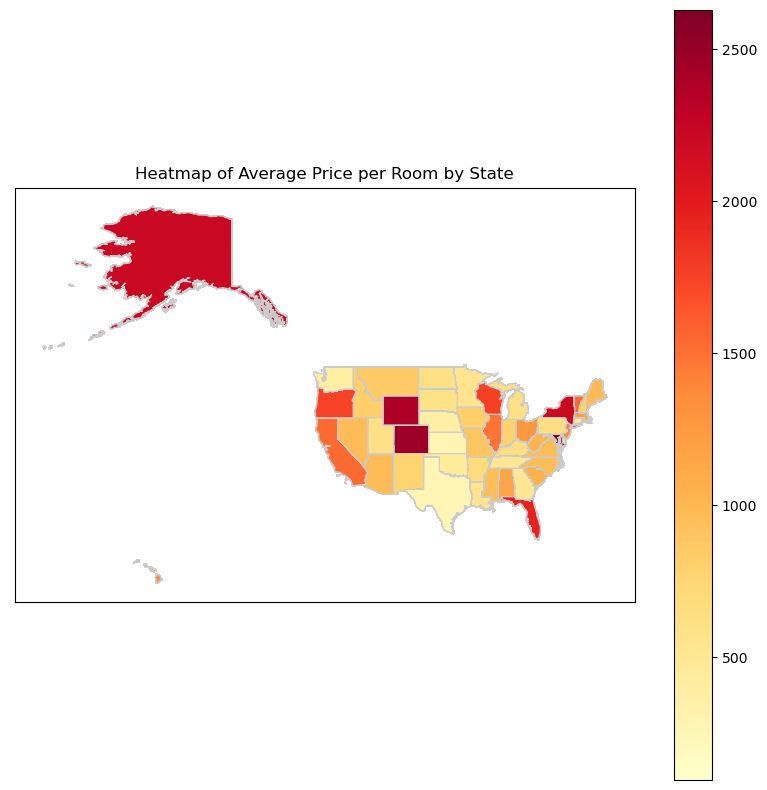

In [47]:
states_shapefile = "States_shapefile.shp"
map_df = gpd.read_file(states_shapefile)

test = modified2_db.copy()
test.rename(columns={'State': 'State_Code', 'Average_price_per_room': 'Price'}, inplace=True)
merged_df = map_df.merge(test, on='State_Code')

fig, ax = plt.subplots(figsize=(10, 10))

merged_df.plot(column='Price', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)



ax.set_title('Heatmap of Average Price per Room by State')
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

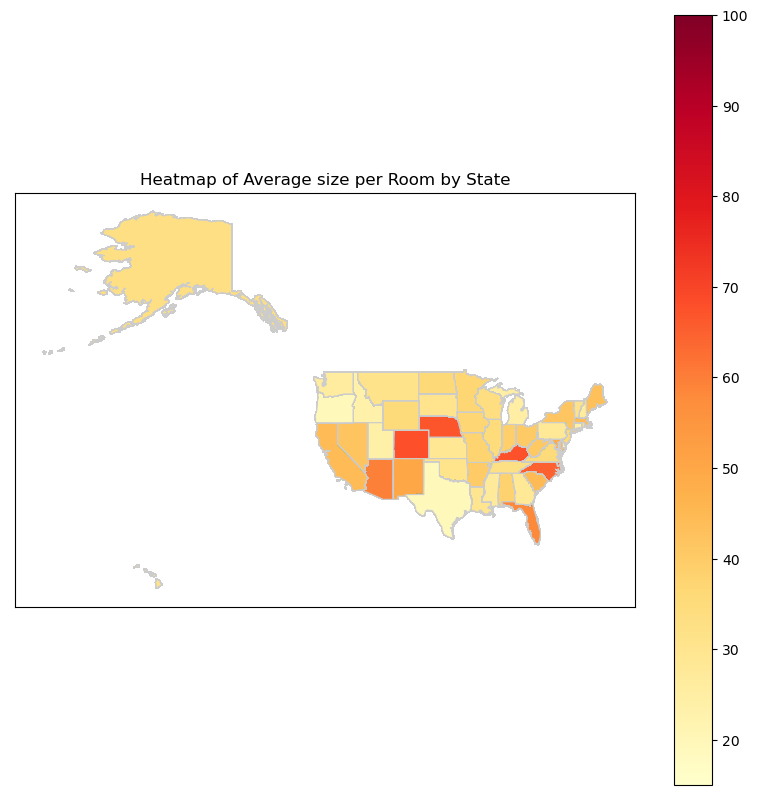

In [48]:
map_df = gpd.read_file(states_shapefile)

test = modified2_db.copy()
test.rename(columns={'State': 'State_Code', 'Average_size_per_room': 'Price'}, inplace=True)
merged_df = map_df.merge(test, on='State_Code')

fig, ax = plt.subplots(figsize=(10, 10))

merged_df.plot(column='Price', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Heatmap of Average size per Room by State')
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

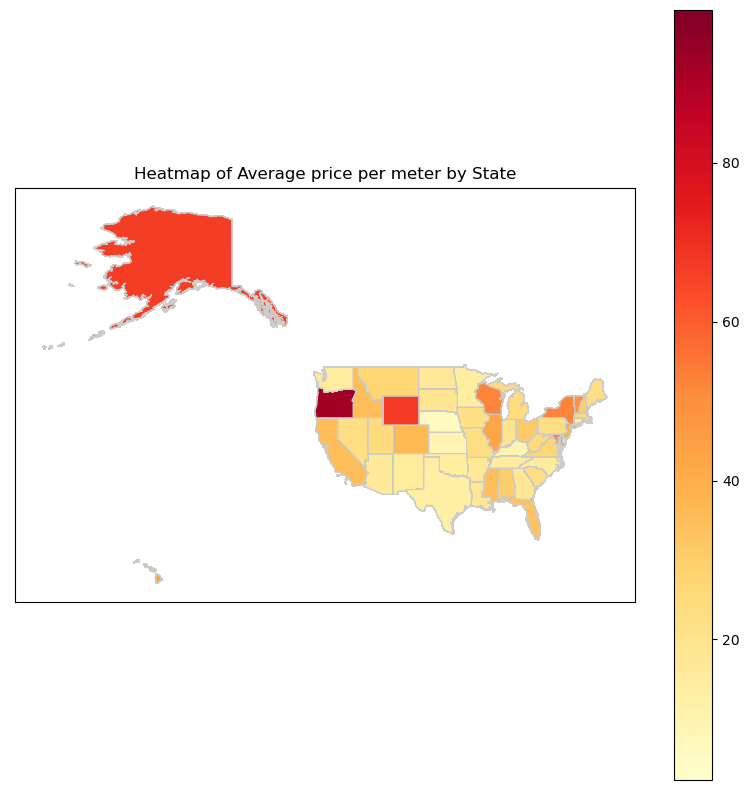

In [49]:
map_df = gpd.read_file(states_shapefile)

test = modified2_db.copy()
test.rename(columns={'State': 'State_Code', 'Average_price_for_meter': 'Price'}, inplace=True)
merged_df = map_df.merge(test, on='State_Code')

fig, ax = plt.subplots(figsize=(10, 10))

merged_df.plot(column='Price', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Heatmap of Average price per meter by State')
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

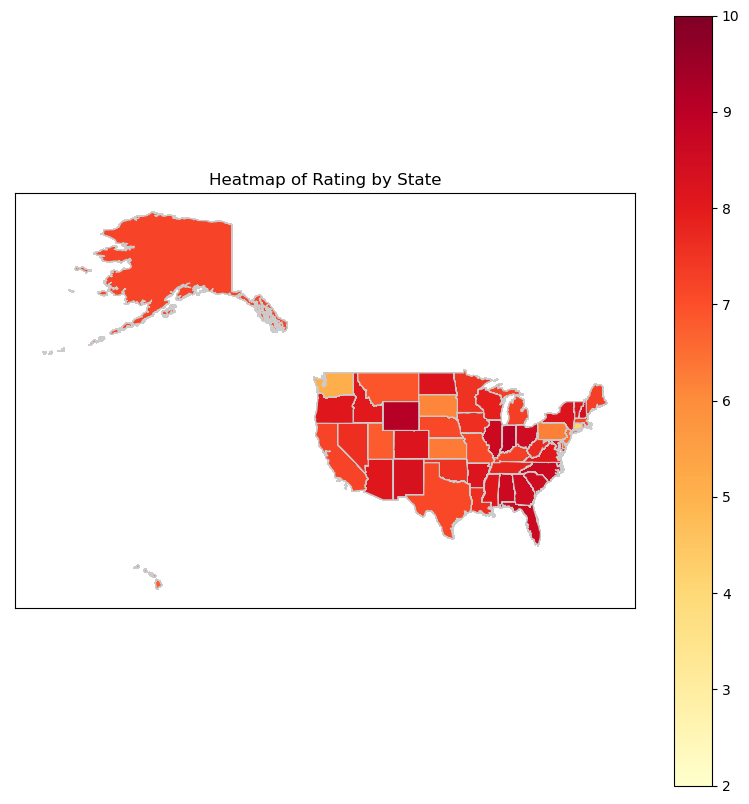

In [50]:
map_df = gpd.read_file(states_shapefile)

test = modified2_db.copy()
test.rename(columns={'State': 'State_Code', 'Rating': 'Price'}, inplace=True)
merged_df = map_df.merge(test, on='State_Code')

fig, ax = plt.subplots(figsize=(10, 10))

merged_df.plot(column='Price', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Heatmap of Rating by State')
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

<h1>Advanced Analysis and Algorithm searching</h1>

<h3>Exploring Different Algorithms for Regression</h3>

To facilitate our analysis and make the data more manageable, we will transform the target variable, which is the rating, into a range of values from 0 to 1. This transformation allows us to work with a standardized scale and simplifies the interpretation of the results. By normalizing the ratings, we can better compare and assess the performance of the various regression algorithms.

Additionally, to create a new index for our analysis, we will define a criterion for success based on an above-average rating. This will enable us to categorize the instances into two groups: "successful" and "not successful." By creating this binary classification, we can apply a broader range of machine learning algorithms that are suitable for classification tasks.

<h4>Defining "Success" and Creating the "Is Successful" Index</h4>
To establish a measure of success, we will consider the average rating as a threshold. Instances with ratings above the average will be labeled as "successful," while those below the average will be labeled as "not successful."

This classification based on the average rating provides us with a clear distinction between instances that perform better than the norm and those that fall below it. By defining success in this manner, we can focus our analysis on understanding the factors that contribute to achieving above-average ratings.

With this new binary index, denoted as "is successful," we can now proceed with implementing and evaluating various regression algorithms to predict the success of instances based on their features. The "is successful" index will serve as our target variable, representing the dependent variable we aim to predict.

By examining different regression algorithms and their performance in predicting the "is successful" index, we can gain insights into which methods are more effective in identifying the key features that contribute to success in our regression problem.

<h2>Testing Stage </h2>

In [51]:
# make the values to range of 0 to 1
modified3_db = modified2_db.copy()
modified3_db['other'] = modified3_db['Type'].apply(lambda x: 1 if x in ['other'] else 0)
modified3_db['hotel'] = modified3_db['Type'].apply(lambda x: 1 if x in ['hotel'] else 0)
modified3_db['motel'] = modified3_db['Type'].apply(lambda x: 1 if x in ['motel'] else 0)
modified3_db = modified3_db.drop('Type', axis=1)


modified3_db = modified3_db.drop('Name', axis=1)

modified3_db["Rating"] = modified2_db["Rating"] /10


In [52]:
X = modified3_db.drop('Rating', axis=1)  # Features (all columns except 'Rating')
X = X.drop('English', axis=1)  
X = X.drop('Air conditioning', axis=1)  
state_dummies = pd.get_dummies(X["State"], prefix="State")
X = pd.concat([X, state_dummies], axis=1)
X = X.drop('State', axis=1)
X.head(5)

,Number_of_reviews,Stars,Average_price_per_room,Average_size_per_room,Average_price_for_meter,facility_count,Non-smoking rooms,Heating,24-hour front desk,WiFi,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_Va,State_WA,State_WI,State_WV,State_WY
0,13,4,928.000000,65.000000,14.276923,100,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,52,3,386.000000,74.000000,5.216216,31,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,624,4,1940.923077,60.833333,31.905585,51,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,941,2,1631.000000,93.000000,17.537634,55,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,45,4,1269.666667,83.666667,15.175299,56,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<h2>logistic regression - Above Avg</h2>
Logistic regression is a supervised learning algorithm used for binary classification tasks. Despite its name, it is primarily used for classification rather than regression. Logistic regression models the relationship between the input features and the probability of the binary outcome.

In [54]:
average_rating = modified3_db["Rating"].mean()

#before improvment
X = modified3_db.drop('Rating', axis=1)  # Features (all columns except 'Rating')
#X = X.drop('English', axis=1)  
#X = X.drop('Air conditioning', axis=1)  
X = X.drop('other', axis=1)
X = X.drop('hotel', axis=1)
X = X.drop('motel', axis=1)
modified3_db["Above_Avg"] = modified3_db["Rating"].apply(lambda x: 1 if x > average_rating else 0)
X = modified3_db.drop('Rating', axis=1) 
X = X.drop('Above_Avg', axis=1)  

#state_dummies = pd.get_dummies(X["State"], prefix="State")
#X = pd.concat([X, state_dummies], axis=1)
X = X.drop('State', axis=1)
X

,Number_of_reviews,Stars,Average_price_per_room,Average_size_per_room,Average_price_for_meter,facility_count,English,Air conditioning,Non-smoking rooms,Heating,...,Elevator,Hairdryer,Cable channels,Bathtub,Iron,Alarm clock,Toilet paper,other,hotel,motel
0,13,4,928.000000,65.000000,14.276923,100,1,1,1,1,...,0,1,1,1,1,0,1,1,0,0
1,52,3,386.000000,74.000000,5.216216,31,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,624,4,1940.923077,60.833333,31.905585,51,1,1,1,1,...,1,1,0,0,1,0,0,0,1,0
4,941,2,1631.000000,93.000000,17.537634,55,1,1,1,0,...,1,1,1,1,1,1,1,0,1,0
6,45,4,1269.666667,83.666667,15.175299,56,1,0,1,1,...,0,1,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14520,30,0,985.250000,43.000000,22.912791,101,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0
14521,159,4,966.960000,59.500000,16.251429,135,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
14522,58,4,1270.750000,40.500000,31.376543,80,1,1,1,1,...,1,1,0,0,1,0,0,1,0,0
14525,81,3,2190.000000,41.750000,52.455090,102,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0


In [55]:
y = modified3_db['Above_Avg']  # Target variable ('Rating' column)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predicted_vals = model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, predicted_vals)
print("Accuracy Before:", accuracy)


Accuracy Before: 0.7846374730796841


In [56]:
average_rating = modified3_db["Rating"].mean()
modified3_db["Above_Avg"] = modified3_db["Rating"].apply(lambda x: 1 if x > average_rating else 0)
X = modified3_db.drop('Rating', axis=1) 
X = X.drop('State', axis=1)
X = X.drop('Above_Avg', axis=1)  
X = X.drop('English', axis=1)  
X = X.drop('Air conditioning', axis=1)  
X = X.drop('facility_count', axis=1)  

In [57]:
y = modified3_db['Above_Avg']  # Target variable ('Rating' column)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predicted_vals = model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, predicted_vals)
print("Accuracy After:", accuracy)


Accuracy After: 0.7849964106245513


<h2>Classifier obj - Above Avg</h2>


In [58]:
def get_classifier_obj(classifier_name, params):
    if classifier_name == 'KNN':
        if params is not None and 'n_neighbors' in params:
            return KNeighborsClassifier(n_neighbors=params['n_neighbors'])
        else:
            return KNeighborsClassifier()
    elif classifier_name == 'naive_bayes':
        return GaussianNB()
    elif classifier_name == 'svm':
        return SVC()
    elif classifier_name == 'decision_tree':
        if params is not None and 'max_depth' in params and 'min_samples_split' in params:
            return tree.DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
        else:
            return tree.DecisionTreeClassifier()
    elif classifier_name == 'random_forest':
        if params is not None and 'n_estimators' in params:
            return RandomForestClassifier(n_estimators=params['n_estimators'])
        else:
            return RandomForestClassifier()

<h3>KNN - Above Avg</h3>
K-Nearest Neighbors (KNN):
K-Nearest Neighbors is a simple and intuitive supervised learning algorithm used for classification and regression tasks. It is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution.
The KNN algorithm works as follows:

During the training phase, KNN stores the feature vectors and their corresponding class labels of the training data.
In the prediction phase, when a new instance is presented, KNN identifies the K nearest neighbors in the training data based on a distance metric (e.g., Euclidean distance) between the feature vectors.
The class label of the new instance is determined by a majority vote among the K nearest neighbors. For classification, the class label with the highest count among the neighbors is assigned. For regression, the algorithm can return the average or weighted average of the target values of the K neighbors.
The choice of the value K, the number of neighbors to consider, is an important parameter in the KNN algorithm. A smaller value of K tends to be more sensitive to local variations in the data, while a larger value of K smooths out the decision boundaries but may lead to misclassifications in complex regions.

In [59]:
def calc_evaluation_val(eval_metric, y_test, y_predicted):
    if eval_metric == 'accuracy':
        return accuracy_score(y_test, y_predicted)
    elif eval_metric == 'precision':
        return precision_score(y_test, y_predicted)
    elif eval_metric == 'recall':
        return recall_score(y_test, y_predicted)
    elif eval_metric == 'f1':
        return f1_score(y_test, y_predicted)
    elif eval_metric == 'confusion_matrix':
        return confusion_matrix(y_test, y_predicted)

In [60]:
def find_best_k_for_KNN(X_train, y_train):
    clf = KNeighborsClassifier()
    params = {"n_neighbors": [3,5,7,11,13]}
    
    f1_scorer = make_scorer(f1_score)
    clfCV = GridSearchCV(clf, params, scoring=f1_scorer)
    clfCV.fit(X_train, y_train)
    
    best_K = clfCV.best_params_["n_neighbors"]
    best_f1_scores = clfCV.cv_results_['mean_test_score']
    best_f1_val = best_f1_scores[np.argmax(best_f1_scores)]
    
    return best_K, best_f1_val

In [61]:
average_rating = modified3_db["Rating"].mean()
modified3_db["Above_Avg"] = modified3_db["Rating"].apply(lambda x: 1 if x > average_rating else 0)
X = modified3_db.drop('Rating', axis=1) 
X = X.drop('State', axis=1)
X = X.drop('Above_Avg', axis=1)  
X = X.drop('English', axis=1)  
X = X.drop('Air conditioning', axis=1)  
X = X.drop('facility_count', axis=1)  
print("Before:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
find_best_k_for_KNN(X_train, y_train)


Before:


(13, 0.7883408529663178)

In [62]:
#before improvment
X = modified3_db.drop('Rating', axis=1)  # Features (all columns except 'Rating')
#X = X.drop('English', axis=1)  
#X = X.drop('Air conditioning', axis=1)  
X = X.drop('other', axis=1)
X = X.drop('hotel', axis=1)
X = X.drop('motel', axis=1)
modified3_db["Above_Avg"] = modified3_db["Rating"].apply(lambda x: 1 if x > average_rating else 0)
X = modified3_db.drop('Rating', axis=1) 
X = X.drop('Above_Avg', axis=1)  

#state_dummies = pd.get_dummies(X["State"], prefix="State")
#X = pd.concat([X, state_dummies], axis=1)
X = X.drop('State', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("After:")
find_best_k_for_KNN(X_train, y_train)


After:


(13, 0.7909392503653698)

<h3>DecisionTreeClassifier, GaussianNB, SVC - Above Avg</h3>
DecisionTreeClassifier:
The DecisionTreeClassifier is a supervised learning algorithm used for classification tasks. It builds a decision tree model based on the training data, where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the outcome or class label.
The algorithm works by recursively partitioning the data based on feature values, aiming to minimize impurity or maximize information gain at each step. The impurity measures used can be Gini impurity or entropy. The decision tree is built until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples required to split a node.

During the training phase, the algorithm learns the optimal splits and decision rules from the provided labeled training data. In the prediction phase, it traverses the decision tree based on the feature values of a given instance and assigns the corresponding class label based on the leaf node reached.

GaussianNB:
GaussianNB, short for Gaussian Naive Bayes, is a probabilistic classifier based on Bayes' theorem. It assumes that the features are independent of each other, and each feature follows a Gaussian (normal) distribution.
The algorithm calculates the posterior probability of each class given the feature values using Bayes' theorem. It multiplies the prior probability of each class (based on the class distribution in the training data) with the likelihood probability of the feature values given the class (estimated from the Gaussian distribution parameters). The class with the highest posterior probability is assigned as the predicted class label.

GaussianNB is relatively fast and performs well on datasets with continuous or real-valued features. However, it makes a strong assumption of feature independence, which might not hold in some cases.

SVC:
SVC, short for Support Vector Classifier, is a supervised learning algorithm used for binary classification tasks. It constructs a hyperplane or a set of hyperplanes in a high-dimensional feature space to separate the classes.
The algorithm aims to find the optimal hyperplane that maximizes the margin between the closest data points of different classes, called support vectors. The margin is the distance between the hyperplane and the support vectors. SVC can handle both linearly separable and non-linearly separable data by using different kernels (e.g., linear, polynomial, radial basis function).

During the training phase, the algorithm solves an optimization problem to find the hyperplane(s) with the maximum margin. In cases where the data is not linearly separable, it transforms the data into a higher-dimensional space using the kernel trick, where it becomes linearly separable. In the prediction phase, the algorithm assigns the class label based on which side of the hyperplane a given instance falls.

SVC can handle complex decision boundaries and works well on small to medium-sized datasets. However, it can be computationally expensive for large datasets.

In [63]:
def find_best_decision_tree_params(X_train, y_train):
    param_grid = {'max_depth': [4, 6], 'min_samples_split': [5, 10, 20]}
    clf = DecisionTreeClassifier()
    scorer = make_scorer(f1_score)
    grid = GridSearchCV(clf, param_grid=param_grid, scoring=scorer)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    best_score = grid.best_score_
    return best_params['max_depth'], best_params['min_samples_split'], best_score


In [64]:
def find_best_random_forest_num_estimators(X_train, y_train):
    param_grid = {'n_estimators': [11, 51, 71]}
    rf_classifier = RandomForestClassifier()
    scorer = make_scorer(f1_score)
    grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, scoring=scorer)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    return best_params['n_estimators'], best_score

In [65]:
def find_best_model(X_train, y_train, max_depth_val, min_samples_split_val):
    # Initialize the models
    model1 = DecisionTreeClassifier(max_depth=max_depth_val, min_samples_split=min_samples_split_val)
    model2 = GaussianNB()
    model3 = SVC()

    # Put the models into a list
    models = [model1, model2, model3]
    best_recall_val = 0
    best_clf = None
    
    # Iterate over the models
    for model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_macro')
        
        # Find the mean of the cross-validation scores
        mean_score = scores.mean()
        print(model)
        print(mean_score)
        # If the mean score is better than the current best, update the best
        if mean_score > best_recall_val:
            best_recall_val = mean_score
            best_clf = model

    return best_clf, best_recall_val


In [66]:
#before improvment

max_dep=10
min_smpl_splt=2
X = modified3_db.drop('Rating', axis=1)  # Features (all columns except 'Rating')
#X = X.drop('English', axis=1)  
#X = X.drop('Air conditioning', axis=1)  
X = X.drop('other', axis=1)
X = X.drop('hotel', axis=1)
X = X.drop('motel', axis=1)
average_rating = modified3_db["Rating"].mean()
modified3_db["Above_Avg"] = modified3_db["Rating"].apply(lambda x: 1 if x > average_rating else 0)
X = modified3_db.drop('Rating', axis=1) 
X = X.drop('Above_Avg', axis=1)  

#state_dummies = pd.get_dummies(X["State"], prefix="State")
#X = pd.concat([X, state_dummies], axis=1)
X = X.drop('State', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_clf, best_recall_val=find_best_model(X_train, y_train, max_dep, min_smpl_splt)

print("op1:")

print(best_clf)
print(best_recall_val)

DecisionTreeClassifier(max_depth=10)
0.7311255685400596
GaussianNB()
0.7354881839017111
SVC()
0.7037956992387516
op1:
GaussianNB()
0.7354881839017111


In [67]:
max_dep=10
min_smpl_splt=2

average_rating = modified3_db["Rating"].mean()
modified3_db["Above_Avg"] = modified3_db["Rating"].apply(lambda x: 1 if x > average_rating else 0)
X = modified3_db.drop('Rating', axis=1) 
X = X.drop('State', axis=1)
X = X.drop('Above_Avg', axis=1)  
X = X.drop('English', axis=1)  
X = X.drop('Air conditioning', axis=1)  
X = X.drop('facility_count', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_clf, best_recall_val=find_best_model(X_train, y_train, max_dep, min_smpl_splt)
print("op2:")

print(best_clf)
print(best_recall_val)

DecisionTreeClassifier(max_depth=10)
0.7318991706591146
GaussianNB()
0.7346359364243542
SVC()
0.6959481753052806
op2:
GaussianNB()
0.7346359364243542


<h2>Results</h2>
<h3>Below are the accuracy results of the algorithms after improvement</h3>
<table>
  <tr>
    <th>Model</th>
    <th>Score</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.7846374730796841</td>
  </tr>
  <tr>
    <td><strong>KNN(13)</strong></td>
    <td>0.7909392503653698</td>
  </tr>
  <tr>
    <td>DecisionTreeClassifier</td>
    <td>0.7325199330357032</td>
  </tr>
  <tr>
    <td>GaussianNB</td>
    <td>0.7354881839017111</td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>0.7037956992387516</td>
  </tr>
   
</table>
 <h3>It can be seen that the KNN algorithm with 13 neighbors is the best</h3>
